# All In One Place
---
    All In One Place Co. is a multi-brand company that seeks to sell various products at a competitive price and quality assurance. Recently, the marketing team discovered in database that some customers were buying more expensive products frequently. 
    Knowing this, the All In One Place team create a plan to develop a loyalty program for customers, the idea of the Insiders was created. Even with that information, the team isn't sure which customers will be assigned to the program, so the data team was called to cooperate. 
    It is up to the data team to answer the following questions: 
   - Who are the elegible people to participate in the “Insiders Program”?
   - How many clients will be part of the group?
   - Which are the main caracteristics for the group?
   - What is the revenue percentage that comes from the group?
   - Which are the guarantees that the “Insiders Program” is better than the rest of the base?

## PLANNING

1. Identify elegible costumers for Insiders?
    - How can a costumer become eligible? What is a High-Value costumer?
        - **Revenue**:
            - High ticket
            - High LT revenue
            - Low recency
            - High bascket size
            - Low churn probability
            - High revenue forecast
            - High probabilty of pruchase

        - **Cost**:
            - Low return rate

        - **Costumer experience**:
            - High rating
    
2. How many costumers will be included into Insiders?
    - Total customers
    - Rate (%) of members to include in Insiders
        
3. Which are the main characteristics of those costumers?
    - Describe the customers attributes:
        - Age
        - Localization
     
    - Consumption behavior:
        - Same attributes for clustering
        
4. Which is the revenue of Insiders?
    - Total revenue
    - Revenue of Insiders members

5. Which is the revenue forecast for next months of Insiders?
    - LT revenue of Insiders members
    - Cohort analysis

6. What are the conditions to be included in Insiders?
    - Define the period of evualation (1 month, 3 months,...)
    - New members must have similar attributes of current members

7. What are the conditions to be removed in Insiders?
    - Define the period of evualation (1 month, 3 months,...)
    - Members to be removed must have different attributes of group

8. How can we garantee the Insiders program is better than others costumers?
    - A/B Test
    - A/B Bayesian
    - Hypothesis test

9. How can Marketing Dept. increase the revenue?
    - Discount
    - Purchase preference
    - Free freight
    - Company tour

## IMPORTS

In [1]:
# loading packages
from IPython.core.display import HTML
from IPython.core.display import Image
import inflection
import warnings
import pickle

# data manipulation
import numpy as np
import pandas as pd
from datetime import timedelta

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
from plotly import express as px

# data preprocessing
from sklearn.preprocessing import StandardScaler



from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn import cluster as c
from sklearn import metrics as m

## HELPER FUNCTIONS

Numerical

In [2]:
def numerical_metrics(numerical_attributes):
    data_mean = pd.DataFrame(numerical_attributes.apply(np.mean)).T
    data_median = pd.DataFrame(numerical_attributes.apply(np.median)).T
    data_std = pd.DataFrame(numerical_attributes.apply(np.std)).T
    data_min = pd.DataFrame(numerical_attributes.apply(min)).T
    data_max = pd.DataFrame(numerical_attributes.apply(max)).T
    data_range = pd.DataFrame(numerical_attributes.apply(lambda x: x.max() - x.min())).T
    data_q1 = pd.DataFrame(numerical_attributes.apply(lambda x: np.quantile(x, .25) )).T
    data_q3 = pd.DataFrame(numerical_attributes.apply(lambda x: np.quantile(x, .75) )).T
    data_skew = pd.DataFrame(numerical_attributes.apply(lambda x: x.skew())).T
    data_kurtosis = pd.DataFrame(numerical_attributes.apply(lambda x: x.kurtosis())).T

    num_attributes = pd.concat([data_min,data_max,data_range,data_mean,data_median, data_q1, data_q3,data_std,data_skew,data_kurtosis]).T.reset_index()
    num_attributes.columns=['Attributes','Min','Max','Range','Mean','Median','Q1','Q3', 'St deviation','Skewness','Kurtosis']

    return num_attributes

Graphic

In [3]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    plt.style.use( 'seaborn-pastel' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    sns.set()
    
jupyter_settings()

Populating the interactive namespace from numpy and matplotlib


Configuration

In [4]:
# snakecase
def snakecase(cols):
    change_snakecase = lambda x: inflection.underscore(x)
    return list(map(change_snakecase, cols))


def change_df(data):
    return pd.DataFrame(data)


# ignoring errors
warnings.filterwarnings('ignore')

# round
pd.options.display.float_format = '{:.3f}'.format

seed = 42

## DATA

This dataset is avaliable in: https://www.kaggle.com/vik2012kvs/high-value-customers-identification

- **Data fields**
    - Invoice Number: Unique value from every transaction
    - Stock Code Product: Product code
    - Description: Product name
    - Quantity: The quantities of each product per transaction
    - Invoice Date: The day when the transaction was generated
    - Unit Price: Product price per unit
    - Customer ID: Unique ID to each customer
    - Country: Country name

In [5]:
homepath = '/home/gutto/projects/pa005_insiders_clustering/insiders_clustering/'

In [6]:
df_raw = pd.read_csv(homepath + 'data/raw/Ecommerce.csv', low_memory = False)

In [7]:
pickle.dump(df_raw, open(homepath + 'data/processed/df_raw.pkl', 'wb'))

## 1.0 DATA DESCRIPTION

- **Tasks**
    - Dataset Checkpoint
    - Check Data
    - Rename Columns
    - Data Dimensions
    - Data Types
    - Descriptive Statistical

### 1.1 Dataset Checkpoint

In [8]:
df1 = pickle.load(open(homepath + 'data/processed/df_raw.pkl', 'rb'))

In [9]:
df1.head().T

,0,1,2,3,4
InvoiceNo,536365,536365,536365,536365,536365
StockCode,85123A,71053,84406B,84029G,84029E
Description,WHITE HANGING HEART T-LIGHT HOLDER,WHITE METAL LANTERN,CREAM CUPID HEARTS COAT HANGER,KNITTED UNION FLAG HOT WATER BOTTLE,RED WOOLLY HOTTIE WHITE HEART.
Quantity,6,6,8,6,6
InvoiceDate,29-Nov-16,29-Nov-16,29-Nov-16,29-Nov-16,29-Nov-16
UnitPrice,2.550,3.390,2.750,3.390,3.390
CustomerID,17850.000,17850.000,17850.000,17850.000,17850.000
Country,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom
Unnamed: 8,NaN,NaN,NaN,NaN,NaN


### 1.2 Organizing Columns

In [10]:
# changing to snakecase type
cols_old = df1.columns
cols_new = snakecase(cols_old)
df1.columns = cols_new

In [11]:
df1.head().T

,0,1,2,3,4
invoice_no,536365,536365,536365,536365,536365
stock_code,85123A,71053,84406B,84029G,84029E
description,WHITE HANGING HEART T-LIGHT HOLDER,WHITE METAL LANTERN,CREAM CUPID HEARTS COAT HANGER,KNITTED UNION FLAG HOT WATER BOTTLE,RED WOOLLY HOTTIE WHITE HEART.
quantity,6,6,8,6,6
invoice_date,29-Nov-16,29-Nov-16,29-Nov-16,29-Nov-16,29-Nov-16
unit_price,2.550,3.390,2.750,3.390,3.390
customer_id,17850.000,17850.000,17850.000,17850.000,17850.000
country,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom
unnamed: 8,NaN,NaN,NaN,NaN,NaN


In [12]:
df1 = df1[['customer_id', 'country', 'invoice_date', 'invoice_no','stock_code', 'description', 'unit_price', 'quantity', 'unnamed: 8']]

### 1.3 Data Dimensions

In [13]:
print(f'Number of rows: {df1.shape[0]} \nNumber of columns: {df1.shape[1]}')

Number of rows: 541909 
Number of columns: 9


### 1.4 Check Data

In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   customer_id   406829 non-null  float64
 1   country       541909 non-null  object 
 2   invoice_date  541909 non-null  object 
 3   invoice_no    541909 non-null  object 
 4   stock_code    541909 non-null  object 
 5   description   540455 non-null  object 
 6   unit_price    541909 non-null  float64
 7   quantity      541909 non-null  int64  
 8   unnamed: 8    0 non-null       float64
dtypes: float64(3), int64(1), object(5)
memory usage: 37.2+ MB


In [15]:
change_df({'Sum of NA': df1.isna().sum(), '% NA': df1.isna().sum()/df1.shape[0]})

,Sum of NA,% NA
customer_id,135080,0.249
country,0,0.000
invoice_date,0,0.000
invoice_no,0,0.000
stock_code,0,0.000
description,1454,0.003
unit_price,0,0.000
quantity,0,0.000
unnamed: 8,541909,1.000


The unnamed: 8 is empty in all rows, so I will drop that

### 1.5 Deal with NA

In [16]:
df1.drop(['unnamed: 8'], axis = 1, inplace = True)

In this cycle, I'll drop the rows with NA and see the impact.

In [17]:
df1 = df1.dropna(subset = ['description', 'customer_id'])
print(f'Removed data: {1 - df1.shape[0] / df_raw.shape[0]}')
change_df({'Sum of NA': df1.isna().sum(), '% NA': df1.isna().sum()/df1.shape[0]})

Removed data: 0.24926694334288602


,Sum of NA,% NA
customer_id,0,0.000
country,0,0.000
invoice_date,0,0.000
invoice_no,0,0.000
stock_code,0,0.000
description,0,0.000
unit_price,0,0.000
quantity,0,0.000


### 1.6 Duplicated rows and Unique values

In [18]:
print(f'There are {len(df1["invoice_no"].unique())} unique invoice numbers.')
print(f'There are {len(df1["stock_code"].unique())} diferent unique stock codes.')
print(f'There are {len(df1["description"].unique())} unique products descriptions.')
print(f'There are {len(df1["customer_id"].unique())} unique customers.')

There are 22190 unique invoice numbers.
There are 3684 diferent unique stock codes.
There are 3896 unique products descriptions.
There are 4372 unique customers.


In [19]:
df1.drop_duplicates(inplace = True)

### 1.7 Data Types

In [20]:
df1.dtypes

customer_id     float64
country          object
invoice_date     object
invoice_no       object
stock_code       object
description      object
unit_price      float64
quantity          int64
dtype: object

I've found some weird values in invoice_no column, some rows has a letter, like: C536479

1. `invoice_date`: Need to be converted from object to datetime64

In [21]:
df1['invoice_date'] = pd.to_datetime(df1['invoice_date'])

2. `invoice_no`: Need to be converted from object to int64

There are 6 numbers in the invoice_no and, sometimes, 1 letter, always before the numbers.

In [22]:
df1['invoice_number'] = df1['invoice_no'].apply(lambda x: x if len(x) == 6
                                                            else x[1:])

df1['invoice_letter'] = df1['invoice_no'].apply(lambda x: 'no_letter' if len(x) == 6
                                                            else x[0])


In [23]:
df1.sample(10)

,customer_id,country,invoice_date,invoice_no,stock_code,description,unit_price,quantity,invoice_number,invoice_letter
489309,14657.000,United Kingdom,2017-11-20,578008,84997C,CHILDRENS CUTLERY POLKADOT BLUE,4.150,1,578008,no_letter
448847,13975.000,United Kingdom,2017-11-06,575073,22577,WOODEN HEART CHRISTMAS SCANDINAVIAN,0.290,10,575073,no_letter
482210,14881.000,United Kingdom,2017-11-18,577429,20973,12 PENCIL SMALL TUBE WOODLAND,0.650,24,577429,no_letter
101765,13501.000,Switzerland,2017-02-22,544931,37449,CERAMIC CAKE STAND + HANGING CAKES,9.950,2,544931,no_letter
518988,17426.000,United Kingdom,2017-11-29,580130,20973,12 PENCIL SMALL TUBE WOODLAND,0.650,24,580130,no_letter
252118,15673.000,United Kingdom,2017-07-04,559064,23235,STORAGE TIN VINTAGE LEAF,2.890,6,559064,no_letter
106847,12834.000,United Kingdom,2017-02-28,545346,20685,DOORMAT RED RETROSPOT,7.950,2,545346,no_letter
384860,14029.000,United Kingdom,2017-10-05,570184,23176,ABC TREASURE BOOK BOX,2.250,8,570184,no_letter
17596,15021.000,United Kingdom,2016-12-06,537769,71477,COLOUR GLASS. STAR T-LIGHT HOLDER,3.250,1,537769,no_letter
202899,17375.000,United Kingdom,2017-05-22,554509,23107,WHITE HEARTS WIRE PLANT POT HOLDER,2.890,1,554509,no_letter


In [24]:
df1['invoice_number'] = df1['invoice_number'].astype(int64)
df1.drop(['invoice_no'], axis = 1, inplace = True)

In [25]:
df1.dtypes

customer_id              float64
country                   object
invoice_date      datetime64[ns]
stock_code                object
description               object
unit_price               float64
quantity                   int64
invoice_number             int64
invoice_letter            object
dtype: object

### 1.8 Descriptive Statistics

#### 1.8.1 Numerical Attributes

In [26]:
num_attributes = df1.select_dtypes(include=['int64', 'float64'])
num_attributes = num_attributes.drop(columns=['customer_id', 'invoice_number'])
num_cols = num_attributes.columns.tolist()

In [27]:
num_attributes_result = numerical_metrics(num_attributes[num_cols])
num_attributes_result

,Attributes,Min,Max,Range,Mean,Median,Q1,Q3,St deviation,Skewness,Kurtosis
0,unit_price,0.000,38970.000,38970.000,3.474,1.950,1.250,3.750,69.764,449.316,243760.343
1,quantity,-80995.000,80995.000,161990.000,12.183,5.000,2.000,12.000,250.283,0.180,93140.043


`Outliers in unit price and quantity`:

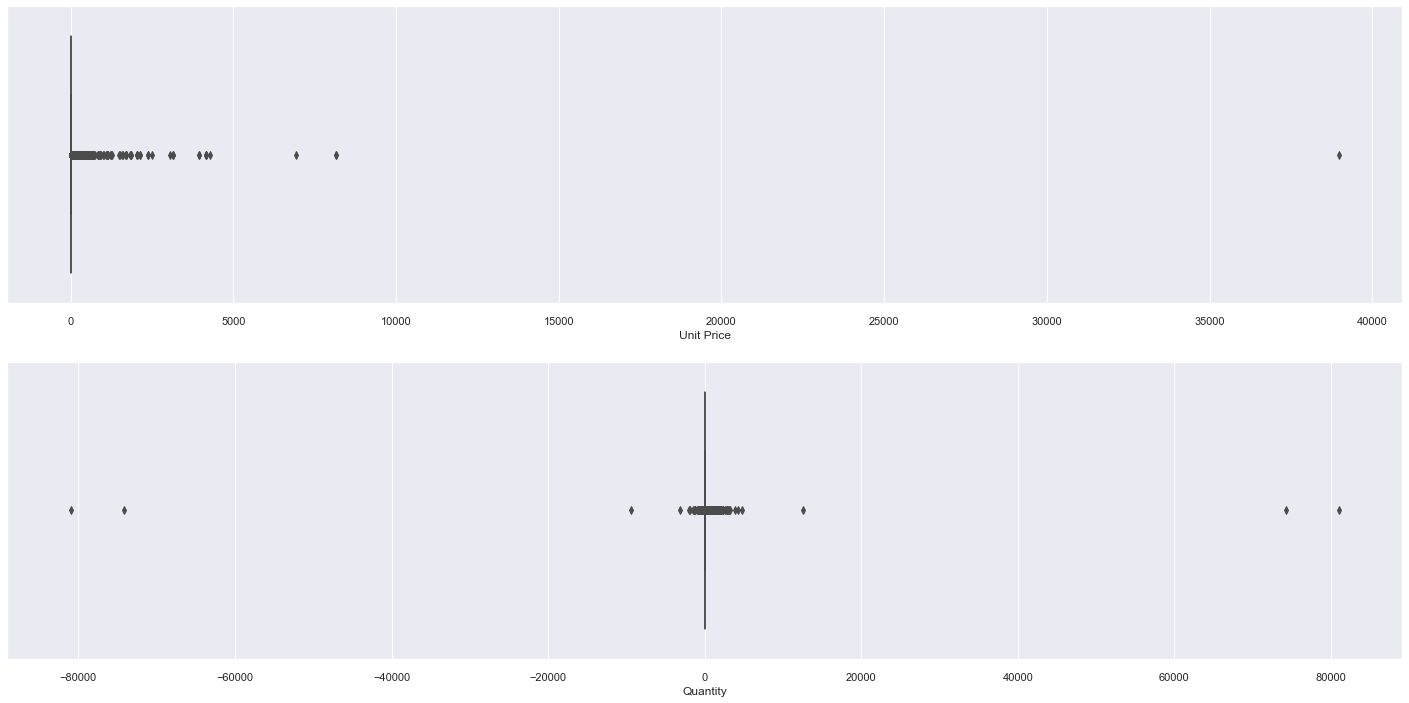

In [28]:
# creating subplots
fig, (ax1, ax2) = plt.subplots(2, 1)

ax = sns.boxplot(df1['unit_price'], ax = ax1);
ax.set_xlabel('Unit Price', fontsize = 12);
ax = sns.boxplot(df1['quantity'], ax = ax2);
ax.set_xlabel('Quantity', fontsize = 12);

#saving figure
plt.savefig(homepath + 'reports/figures/num_attributes_outliers.png')

#### 1.8.2 Categorical Attributes

In [29]:
cat_attributes = df1.select_dtypes(include=['object'])
cat_attributes = cat_attributes.drop(columns=['description'])
cat_cols = cat_attributes.columns.tolist()

`country`:

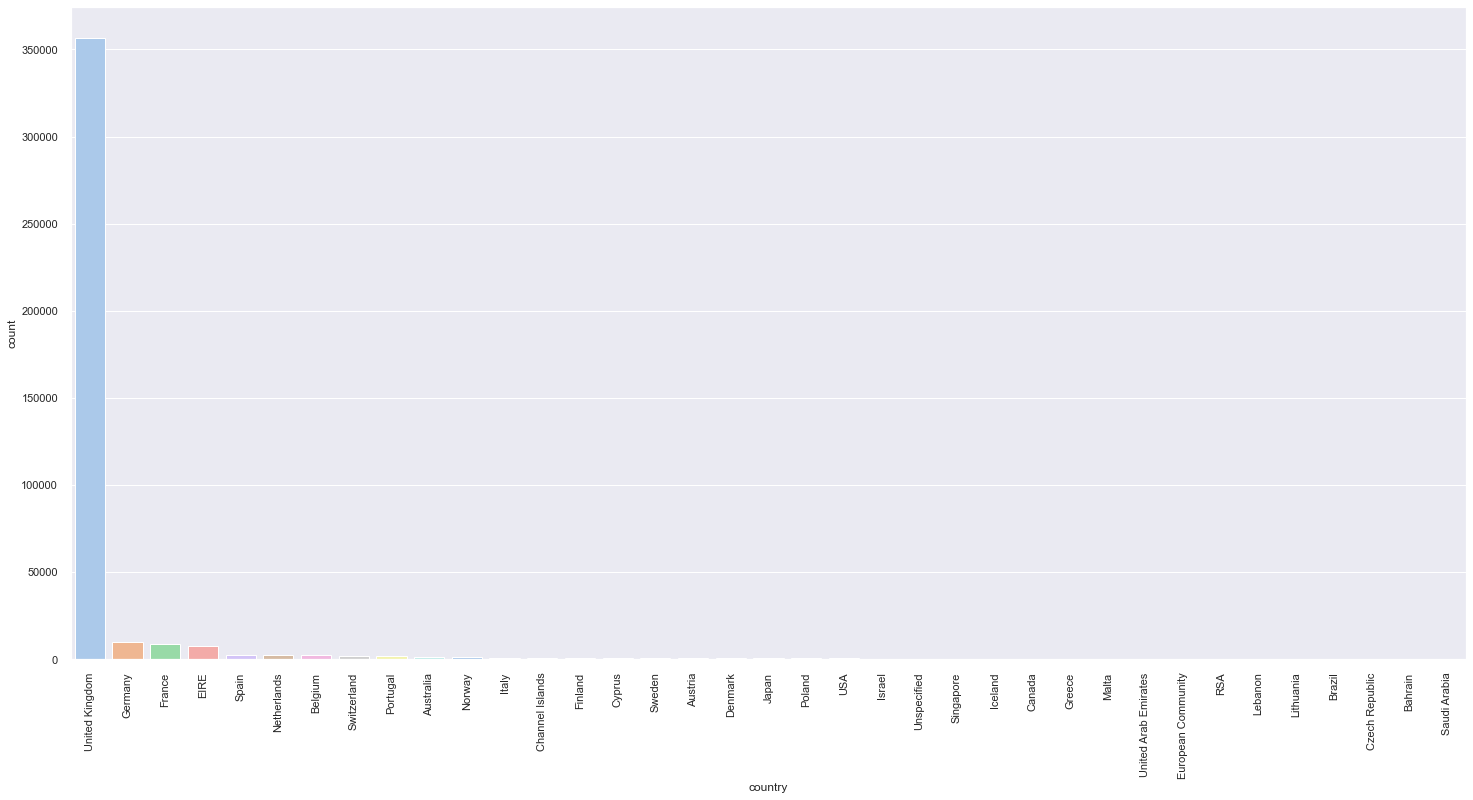

In [30]:
ax = sns.countplot(x = 'country', data = cat_attributes, palette = 'pastel', order = cat_attributes['country'].value_counts().index)
plt.xticks(rotation = 90);

# saving figure
plt.savefig(homepath + 'reports/figures/country_count_uk.png')

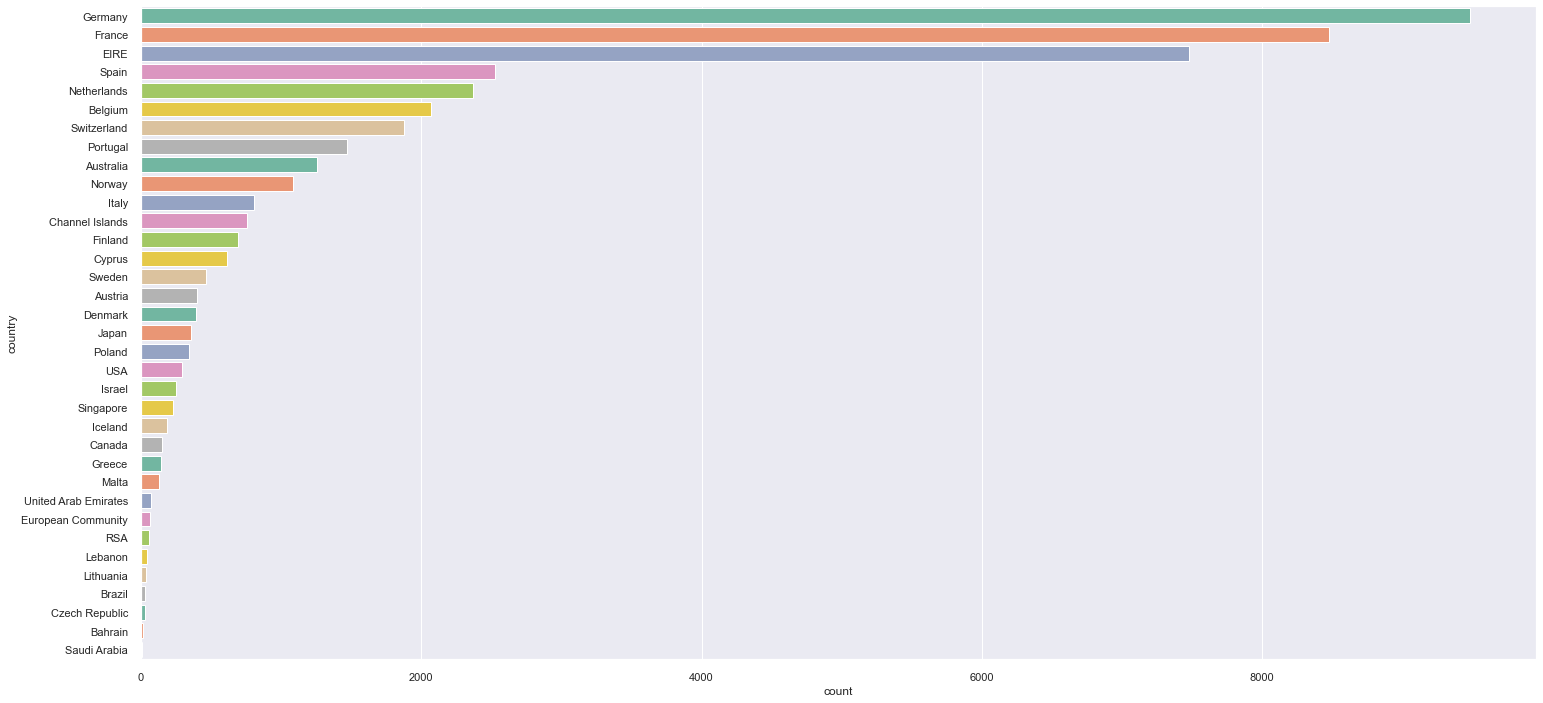

In [31]:
aux1 = cat_attributes[cat_attributes['country'] != 'United Kingdom']
aux2 = aux1[aux1['country'] != 'Unspecified']
ax = sns.countplot(y = 'country', data = aux2, palette = 'Set2', order = aux2['country'].value_counts().index)

# saving figure
plt.savefig(homepath + 'reports/figures/country_count.png')

#### 1.8.3 Date Attributes

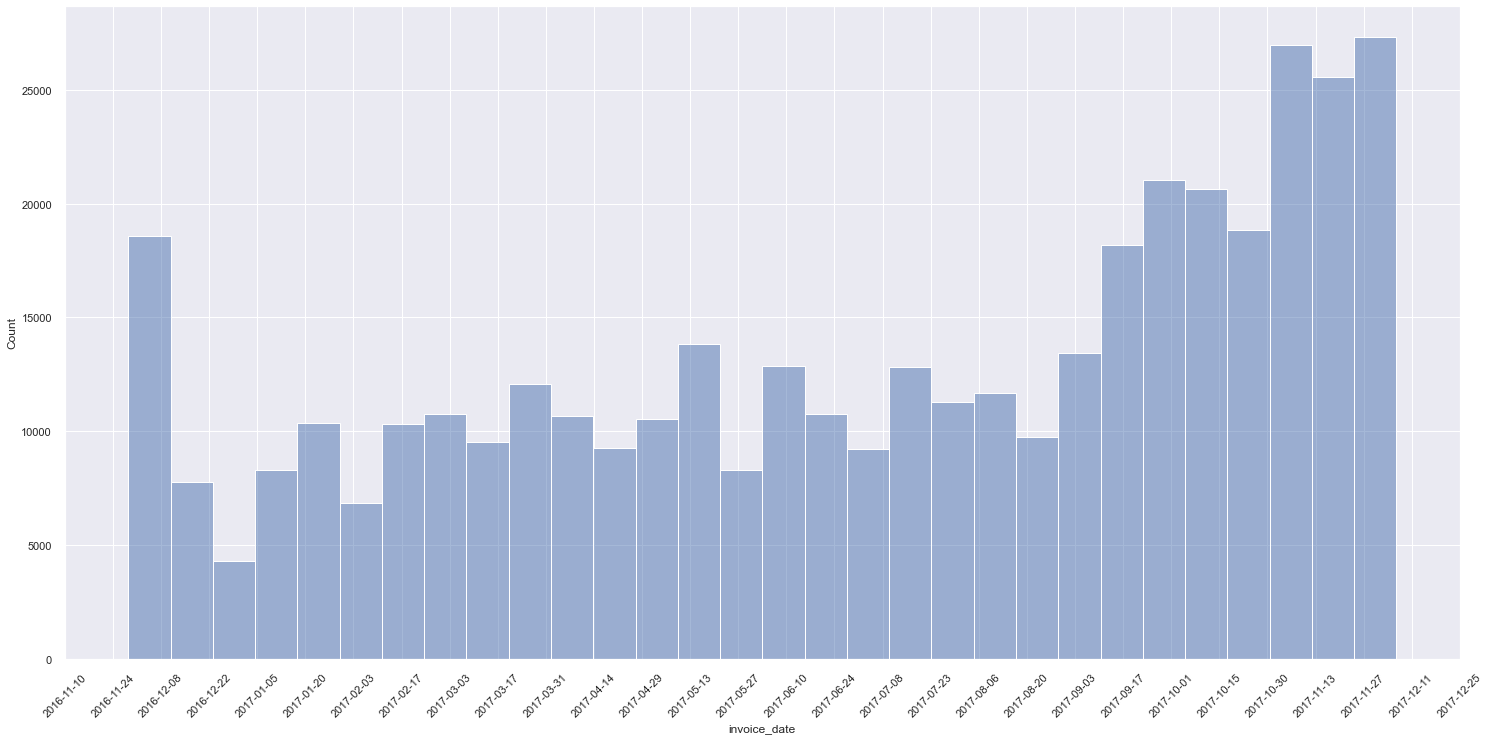

In [32]:
ax = sns.histplot(data = df1, x = 'invoice_date',bins = 30, alpha = 0.5);
plt.xticks(rotation = 45)
ax.xaxis.set_major_locator(ticker.LinearLocator(numticks = 30))

# saving figure
plt.savefig(homepath + 'reports/figures/countplot_date.png')

### 1.9 Save State

In [33]:
pickle.dump(df1, open(homepath + 'data/processed/df1.pkl', 'wb'))

## 2.0 VARIABLE FILTERING

- **Tasks**
    - Dataset Checkpoint
    - Filtering Rows
    - Save State

### 2.1 Dataset Checkpoint

In [34]:
df2 = pickle.load(open(homepath + 'data/processed/df1.pkl', 'rb'))

### 2.2 Filtering Rows

In [35]:
quantity_low = len(df2[df2['quantity'] < 1])
unit_price_low = len(df2[df2['unit_price'] <= 0])
print(f'There are {quantity_low} rows with product quantities in the cart less than 1 and {unit_price_low} rows with price equal or lower than 0')

There are 8872 rows with product quantities in the cart less than 1 and 40 rows with price equal or lower than 0


In [36]:
df2 = df2[(df2['quantity'] > 0) & (df2['unit_price'] > 0)]

In [37]:
df2['unit_price'].min()

0.001

In [38]:
df2 = df2[df2['unit_price'] > 0.001]

### 2.3 Save State

In [39]:
pickle.dump(df2, open(homepath + 'data/processed/df2.pkl', 'wb'))

## 3.0 FEATURE ENGINEERING

- **Tasks**
    - Dataset Checkpoint
    - Features
    - Save State

### 3.1 Dataset Checkpoint

In [40]:
df3 = pickle.load(open(homepath + 'data/processed/df2.pkl', 'rb'))

### 3.2 Features

Creating `year`, `month` and `day`:

In [41]:
# year
df3['invoice_year'] = df3['invoice_date'].dt.year

# month
df3['invoice_month'] = df3['invoice_date'].dt.month

# day
df3['invoice_day'] = df3['invoice_date'].dt.dayofweek

Creating `total_purchase`, `monetary`, `recency` and `frequency`:

In [42]:
# total_purchase
df3['total_purchase'] = df3['quantity'] * df3['unit_price']

# monetary
df_monetary = df3[['customer_id', 'total_purchase']].groupby('customer_id').sum().reset_index()
df_monetary.columns = ['customer_id', 'monetary']
df3 = pd.merge(df3, df_monetary, on='customer_id', how='left')

# recency
df_recency = df3[['customer_id', 'invoice_date']].groupby('customer_id').max().reset_index()
df_recency['recency'] = (df3['invoice_date'].max() - df_recency['invoice_date']).dt.days
df_recency.drop(['invoice_date'], axis = 1, inplace = True)
df3 = pd.merge(df3, df_recency, on='customer_id', how='left')

# frequency
df_frequency = df3[['customer_id', 'invoice_number']].groupby( 'customer_id' ).count().reset_index()
df_frequency.columns = ['customer_id', 'frequency']
df3 = pd.merge( df3, df_frequency, on='customer_id', how='left' )

Creating `monetary score`, `recency score`, `frequency score`, `rfm score` and `rfm level`:

In [43]:
# monetary score
df3['monetary_score'] = df3['monetary'].apply(lambda x: 5 if x >= 8000 else
                                   4 if x < 8000 and x >= 2000 else
                                   3 if x < 2000 and x >= 1000 else
                                   2 if x < 1000 and x >= 500 else 1)

# recency score
df3['recency_score'] = df3['recency'].apply(lambda x: 5 if x <= 30 else
                                   4 if x > 30 and x <= 60 else
                                   3 if x > 60 and x <= 90 else
                                   2 if x > 90 and x <= 120 else 1)

# frequency score
df3['frequency_score'] = df3['frequency'].apply(lambda x: 5 if x >= 500 else
                                   4 if x < 500 and x >= 125 else
                                   3 if x < 125 and x >= 75 else
                                   2 if x < 75 and x >= 50 else 1)

# rfm score
df3['rfm_score'] = (df3['monetary_score'] + df3['recency_score'] + df3['frequency_score'])/3

# rfm level
df3['rfm_level'] = df3['rfm_score'].apply(lambda x: 'Tier S' if x == 5 else
                                   'Champions' if x < 5 and x >= 4 else
                                   'Loyal' if x < 4 and x >= 3 else
                                   'They have potential' if x < 3 and x >= 2 else 'Need a push')

In [44]:
df3.sample(20)

,customer_id,country,invoice_date,stock_code,description,unit_price,quantity,invoice_number,invoice_letter,invoice_year,invoice_month,invoice_day,total_purchase,monetary,recency,frequency,monetary_score,recency_score,frequency_score,rfm_score,rfm_level
21961,16316.000,United Kingdom,2016-12-14,22629,SPACEBOY LUNCH BOX,1.950,12,539255,no_letter,2016,12,2,23.400,2938.910,64,151,4,3,4,3.667,Loyal
175586,13158.000,United Kingdom,2017-07-05,23207,LUNCH BAG ALPHABET DESIGN,1.650,10,559308,no_letter,2017,7,2,16.500,1201.060,94,79,3,2,3,2.667,They have potential
91549,15353.000,United Kingdom,2017-03-28,85014B,RED RETROSPOT UMBRELLA,5.950,2,548313,no_letter,2017,3,1,11.900,770.120,254,61,2,1,2,1.667,Need a push
18875,12370.000,Cyprus,2016-12-12,22087,PAPER BUNTING WHITE LACE,2.950,1,538826,no_letter,2016,12,0,2.950,3541.940,51,166,4,4,4,4.000,Champions
375735,13854.000,United Kingdom,2017-11-29,21386,IVORY HANGING DECORATION EGG,0.190,72,579922,no_letter,2017,11,2,13.680,8109.520,8,110,5,5,3,4.333,Champions
5345,15351.000,United Kingdom,2016-12-03,84969,BOX OF 6 ASSORTED COLOUR TEASPOONS,4.250,1,537057,no_letter,2016,12,5,4.250,1934.660,12,219,3,5,4,4.000,Champions
381605,14075.000,United Kingdom,2017-12-03,23084,RABBIT NIGHT LIGHT,1.790,48,580538,no_letter,2017,12,6,85.920,942.260,4,43,2,5,1,2.667,They have potential
253234,16744.000,United Kingdom,2017-09-23,22630,DOLLY GIRL LUNCH BOX,1.950,2,568142,no_letter,2017,9,5,3.900,1291.910,11,236,3,5,4,4.000,Champions
203391,15518.000,United Kingdom,2017-08-05,85132C,CHARLIE AND LOLA FIGURES TINS,1.950,2,562576,no_letter,2017,8,5,3.900,1921.550,64,210,3,3,4,3.333,Loyal
54177,17085.000,United Kingdom,2017-02-11,22813,PACK 3 BOXES BIRD PANNETONE,1.950,4,543806,no_letter,2017,2,5,7.800,1562.400,123,186,3,1,4,2.667,They have potential


### 3.3 Save State

In [45]:
pickle.dump(df3, open(homepath + 'data/processed/df3.pkl', 'wb'))

## 4.0 EXPLORATORY DATA ANALYSIS

### 4.1 Dataset Checkpoint


In [46]:
df4 = pickle.load(open(homepath + 'data/processed/df3.pkl', 'rb'))

### 4.1 Mind Map

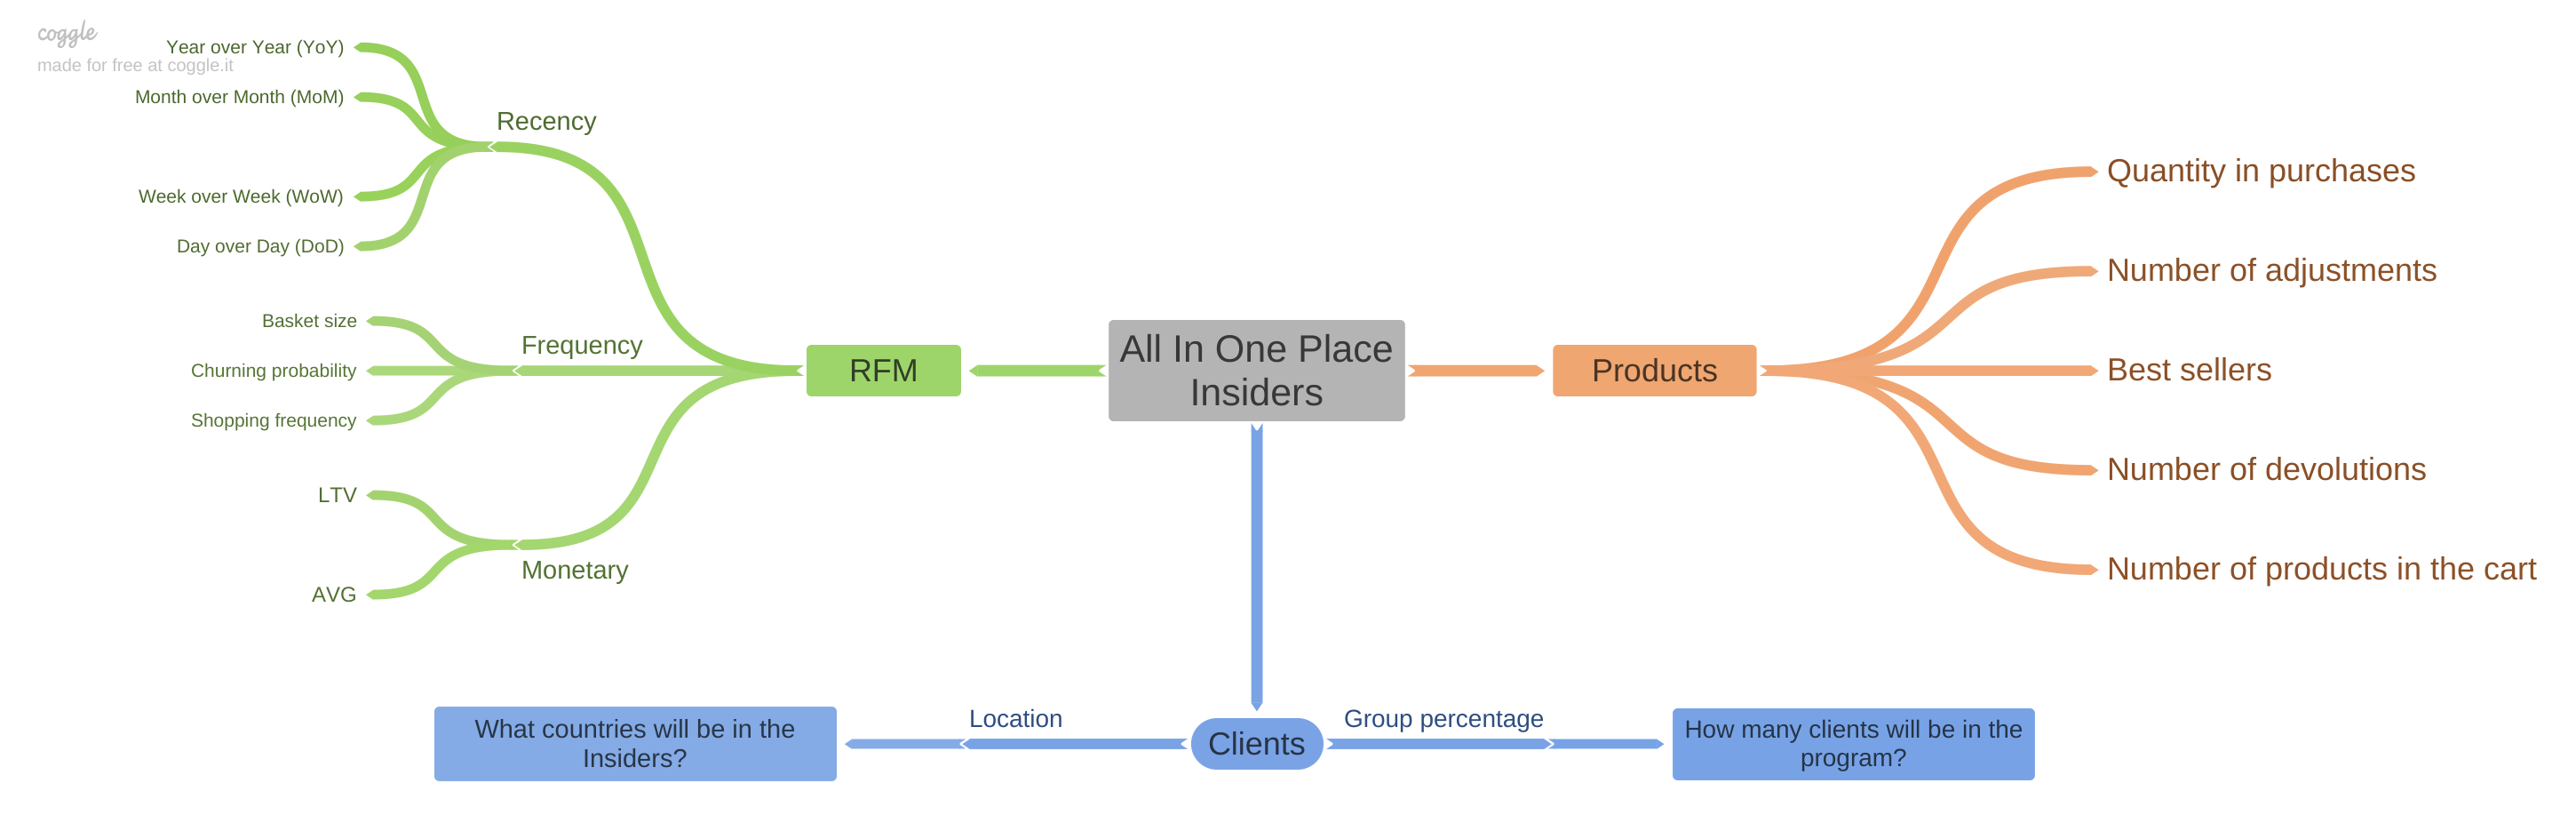

In [47]:
Image(homepath + 'reports/figures/mind_map.png')

### 4. Save State

In [48]:
pickle.dump(df4, open(homepath + 'data/processed/df4.pkl', 'wb'))

## 5.0 DATA PREPARATION

### 5.1 Dataset Checkpoint


In [49]:
df5 = pickle.load(open(homepath + 'data/processed/df4.pkl', 'rb'))

### 5.2 RFM

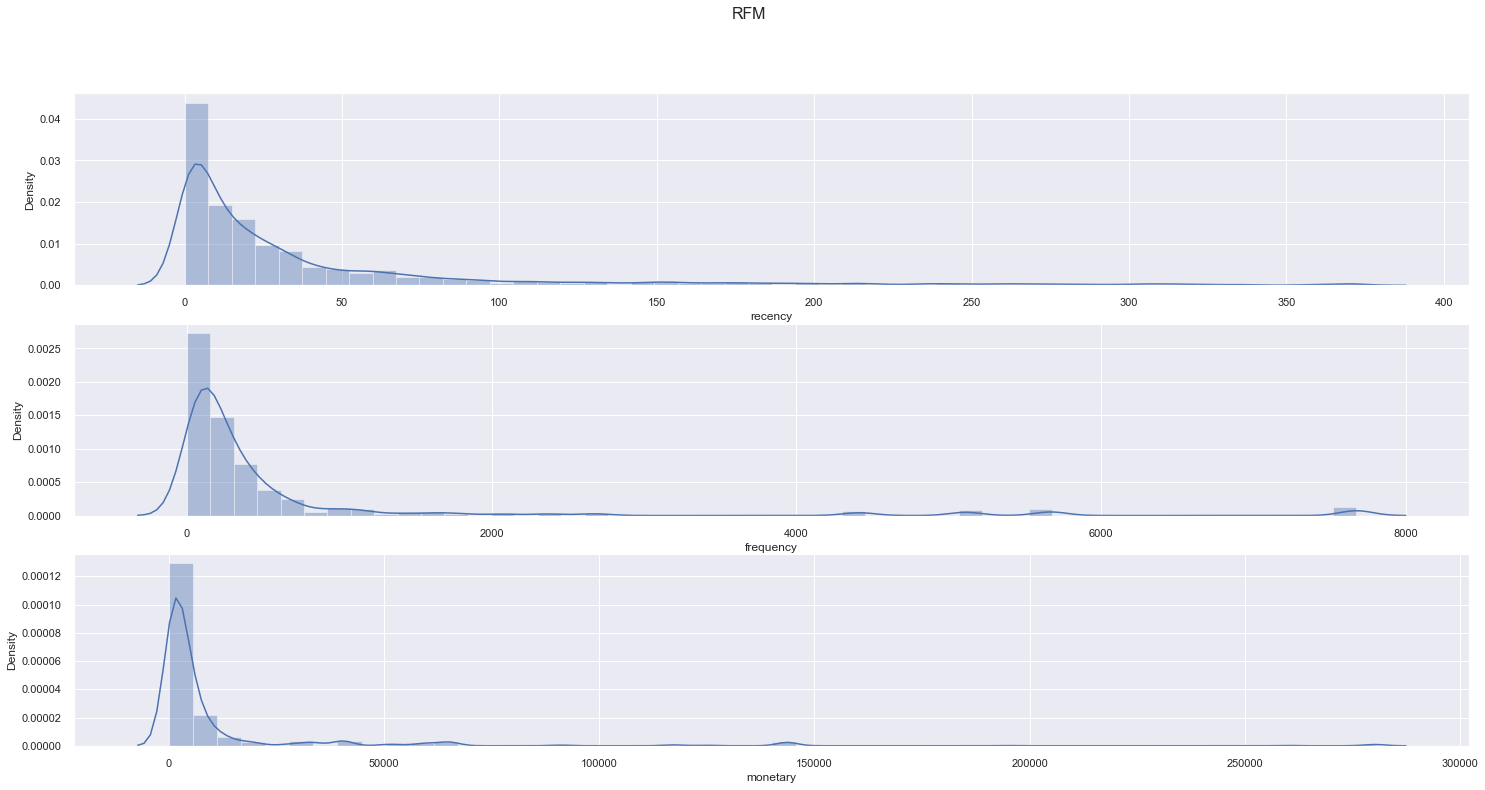

In [50]:
# creating subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1)
fig.suptitle('RFM', fontsize=16)

ax = sns.distplot(df5['recency'], ax = ax1)
ax = sns.distplot(df5['frequency'], ax = ax2)
ax = sns.distplot(df5['monetary'], ax = ax3)

# saving figure
plt.savefig(homepath + 'reports/figures/rfm.png')

In [51]:
df5_transf = df5[['customer_id', 'monetary', 'recency', 'frequency']]
df5_transf.sample(3)

,customer_id,monetary,recency,frequency
15131,14107.000,2703.230,51,123
125388,14056.000,8152.710,1,1088
208969,15376.000,1221.560,40,116


### 5.3 Save State

In [52]:
pickle.dump(df5_transf, open(homepath + 'data/processed/df5.pkl', 'wb'))

## 6.0 FEATURE SELECTION

### 6.1 Dataset Checkpoint


In [53]:
df6 = pickle.load(open(homepath + 'data/processed/df5.pkl', 'rb'))

## 7.0 HYPERPARAMETER FINE TUNING

In [54]:
X = df6.drop(columns=['customer_id'])

In [55]:
X.head()

,monetary,recency,frequency
0,5391.210,372,297
1,5391.210,372,297
2,5391.210,372,297
3,5391.210,372,297
4,5391.210,372,297


In [56]:
clusters = [2, 3, 4]

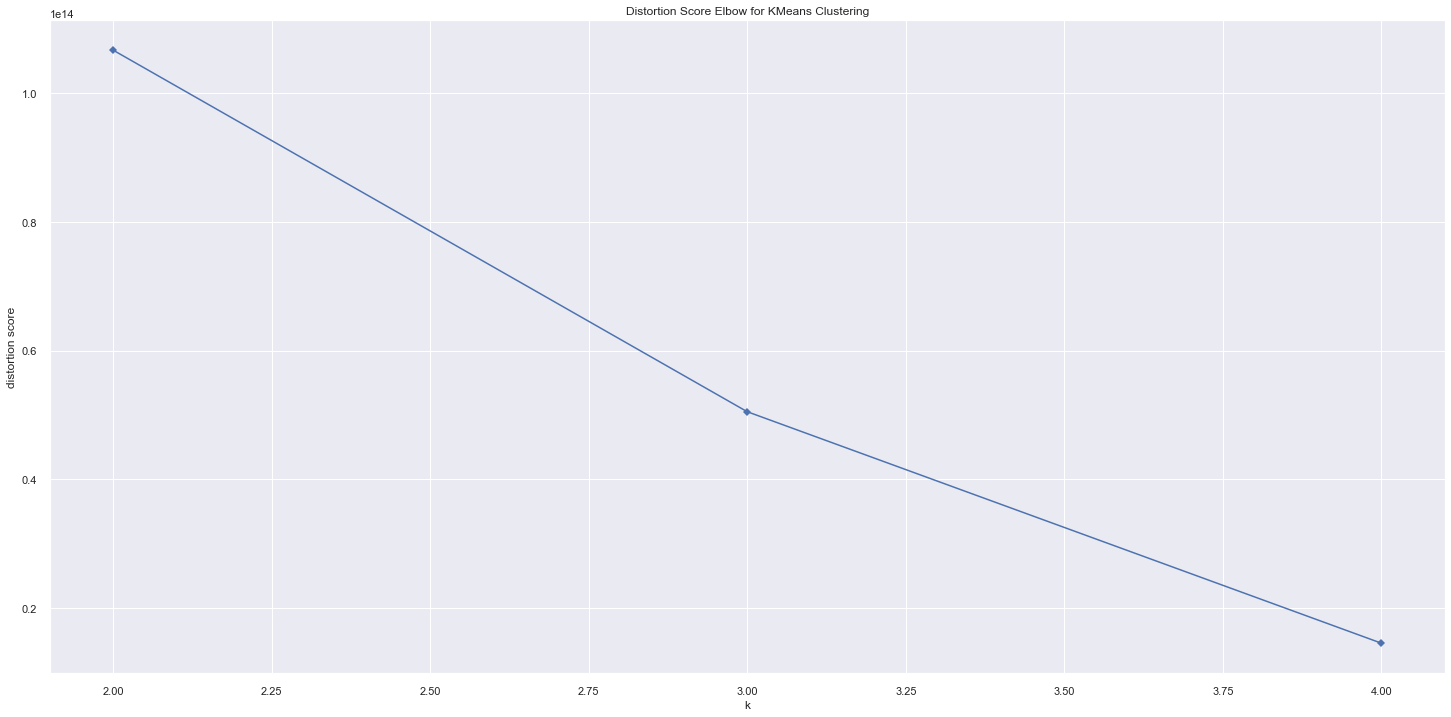

In [57]:
kmeans = KElbowVisualizer(c.KMeans(), k=clusters, timings=False)
kmeans.fit(X)
kmeans.show();

In [ ]:
kmeans = KElbowVisualizer(c.KMeans(), k = clusters, metric = 'silhouette', timings = False)
kmeans.fit(X)
kmeans.show();

## 8.0 MACHINE LEARNING MODELS

In [ ]:
# model definition
k = 5
kmeans = c.KMeans(init='random', n_clusters=k, n_init= 10, max_iter=300)

# model training
kmeans.fit(X)

# clustering
labels = kmeans.labels_

In [ ]:
# WSS ( Within-cluster sum of square)
#print(f'WSS value: {kmeans.inertia}')

## SS ( Silhouette Score )
#print(f'SS value: {m.silhouette_score(X, labels, metric='euclidean')}')

## 9.0 CLUSTER ANALYSIS

In [ ]:
df9 = df6.copy()
df9['cluster'] = labels
df9.head()

In [ ]:
fig = px.scatter_3d( df9, x='recency', y='frequency', z='monetary', color='cluster' )
fig.show()

## 10.0 DEPLOY